<a href="https://colab.research.google.com/github/vkvinay0627/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



# **Importing data**



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df1=pd.read_csv("/content/drive/MyDrive/Almabetter/data_cardiovascular_risk.csv", encoding= 'unicode_escape')
df1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [12]:
df1.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:

# Missing Value Count Function
def show_missing():
    missing = df1.columns[df1.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df1[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df1[show_missing()].isnull().sum().sort_values(ascending = False)/len(df1)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [14]:
df1=df1.drop(['id','education'],axis=1)
df1['heartRate'].fillna(df1['heartRate'].mean(),inplace=True)
df1['BMI'].fillna(df1['BMI'].mean(),inplace=True)
df1['glucose'].fillna(df1['glucose'].mean(),inplace=True)
df1['cigsPerDay'].fillna(df1['cigsPerDay'].mean(),inplace=True)
df1['BPMeds'].fillna(df1['BPMeds'].median(),inplace=True)
df1.dropna(axis=0,inplace=True)
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3352 non-null   int64  
 1   sex              3352 non-null   object 
 2   is_smoking       3352 non-null   object 
 3   cigsPerDay       3352 non-null   float64
 4   BPMeds           3352 non-null   float64
 5   prevalentStroke  3352 non-null   int64  
 6   prevalentHyp     3352 non-null   int64  
 7   diabetes         3352 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3352 non-null   float64
 10  diaBP            3352 non-null   float64
 11  BMI              3352 non-null   float64
 12  heartRate        3352 non-null   float64
 13  glucose          3352 non-null   float64
 14  TenYearCHD       3352 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 419.0+ KB


(3352, 15)

In [15]:
df1.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
df = df1.copy()

In [17]:
Categorical_columns = df.iloc[:,:]
discrete = []
for var in Categorical_columns:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} Categorical columns'.format(len(discrete)))

sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 7 Categorical columns


# **Exploratory Data Analyis**

## Uni-variate Analysis

In [11]:
categorical_features = df.loc[:,['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
categorical_features.head()

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,F,YES,0.0,0,0,0,1
1,M,NO,0.0,0,1,0,0
2,F,YES,0.0,0,0,0,0
3,M,YES,0.0,0,1,0,1
4,F,YES,0.0,0,0,0,0


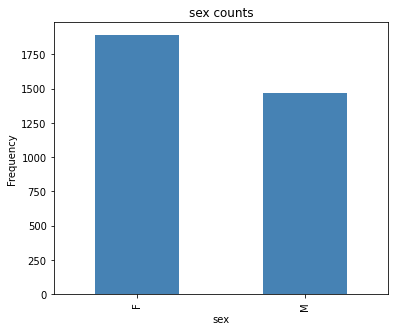

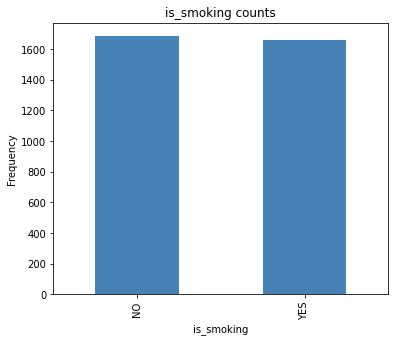

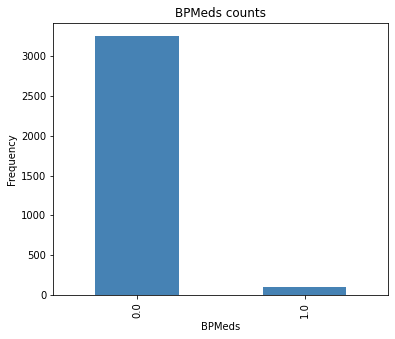

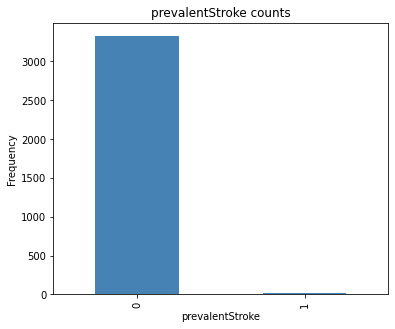

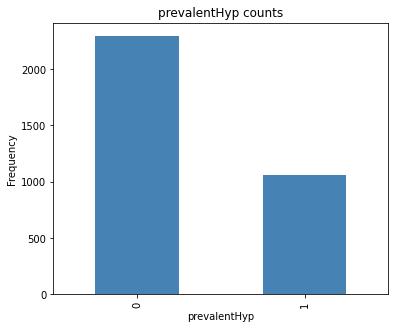

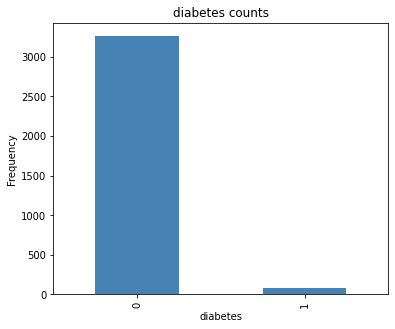

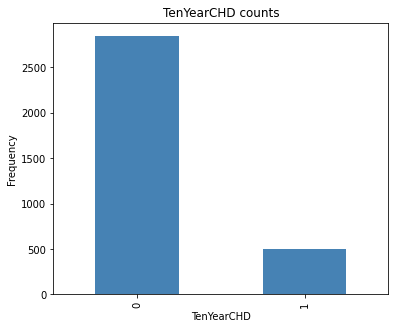

In [12]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [13]:
Numerical_columns = df.iloc[:,:]
discrete = []
for var in Numerical_columns:
    if len(df[var].unique())>10:
        print(var)
        discrete.append(var)
        
print('There are {} Numerical columns'.format(len(discrete)))

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose
There are 8 Numerical columns


In [14]:
numerical_features = df.loc[:,['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
numerical_features.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,3.0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.420000,70.0,77.0


In [15]:
# # plot a bar plot for each numerical feature count

# for col in numerical_features[:]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = df[col]
#     feature.hist(bins=50, ax = ax)
#     ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#     ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
#     ax.set_title(col)
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


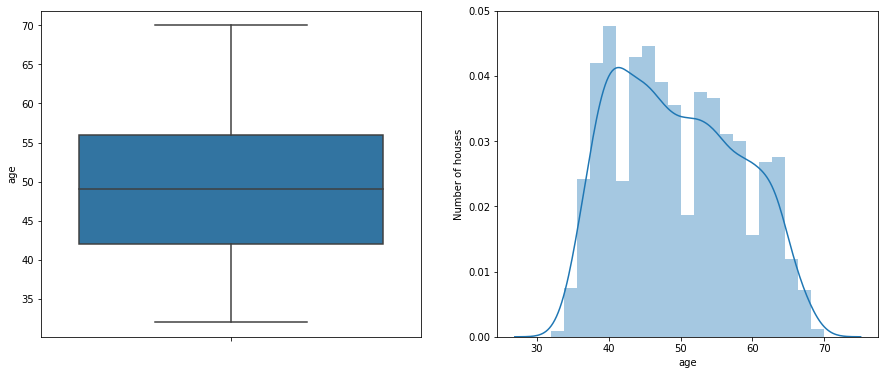

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


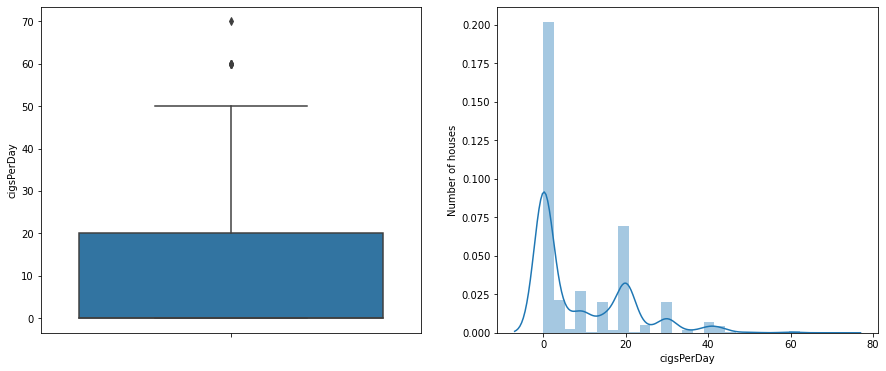

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


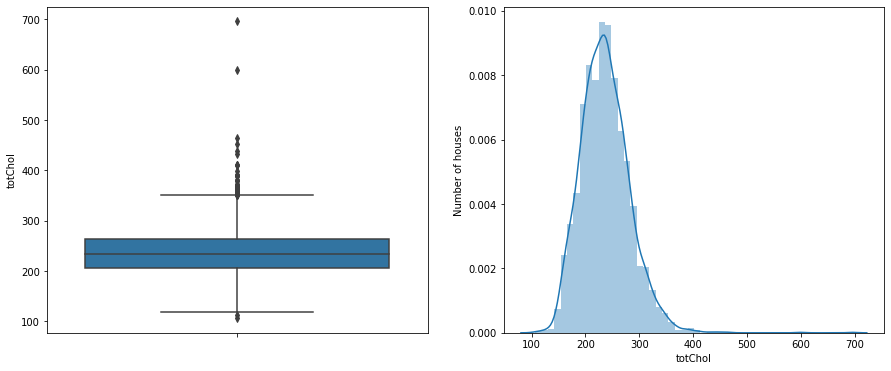

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


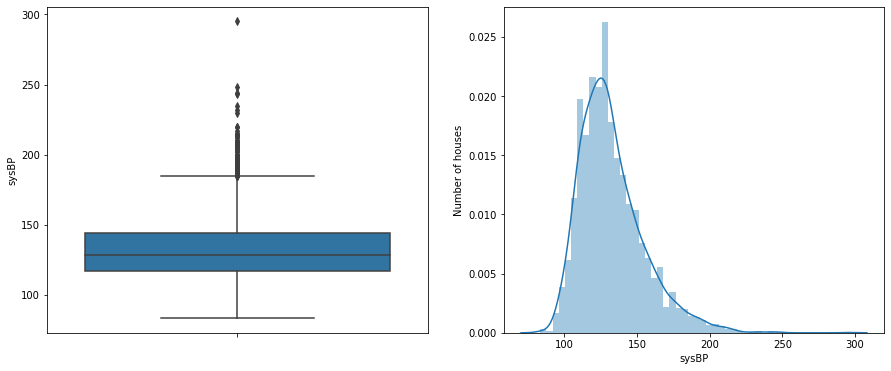

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


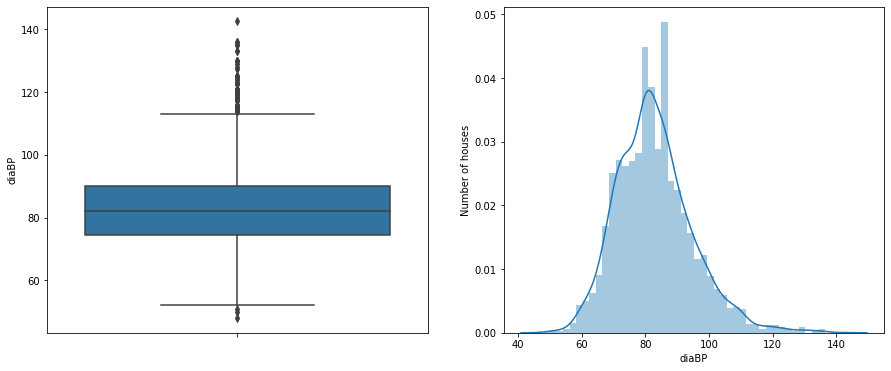

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


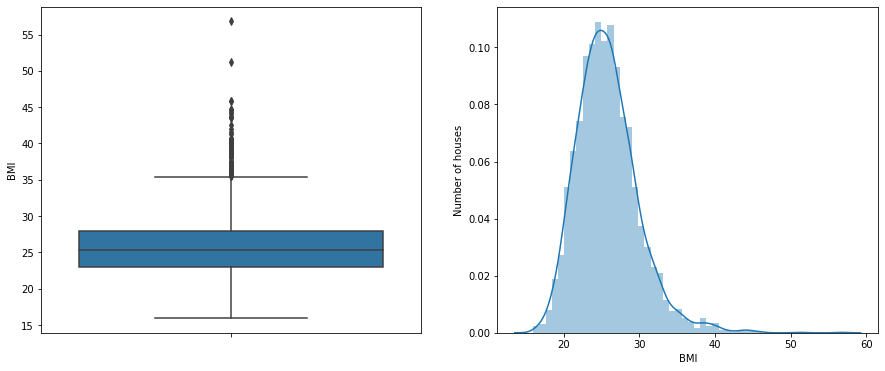

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


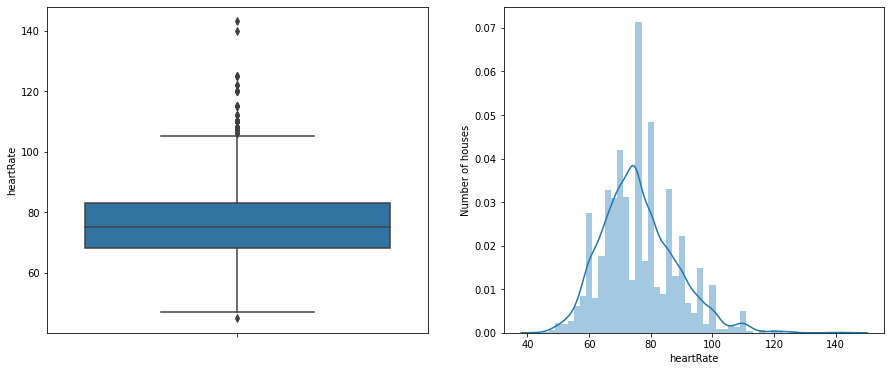

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


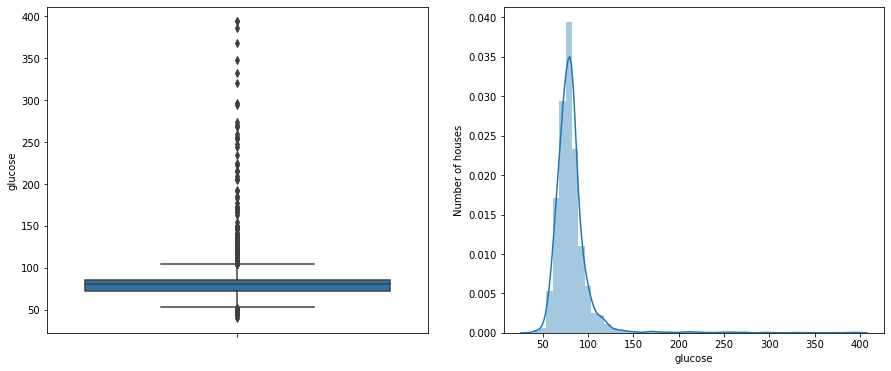

In [16]:
for var in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

## Bi-variate Analysis

# **Feature Engineering**

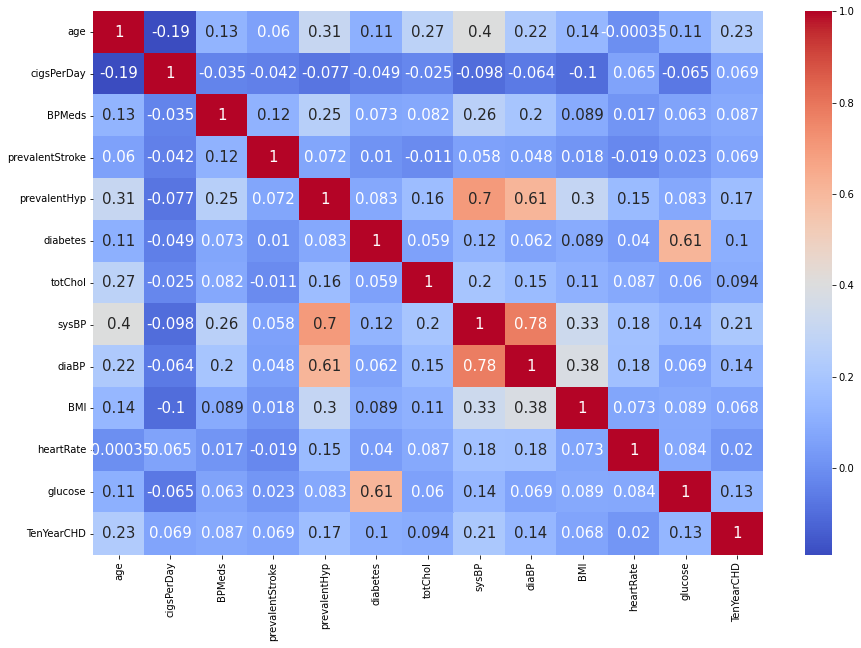

In [18]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [19]:
# df = df.drop(['diaBP'] , 1)
# df.head()

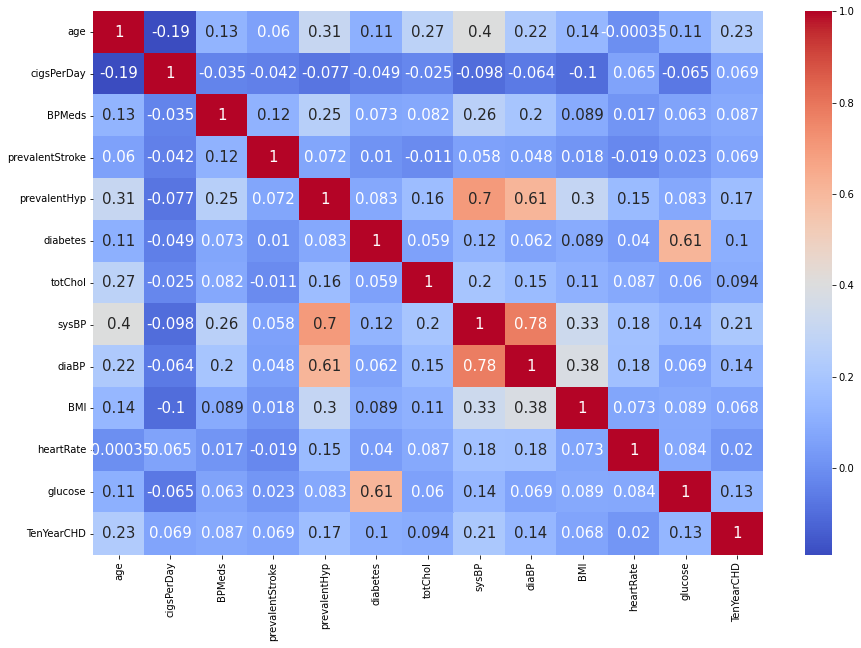

In [20]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [21]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [22]:
df = pd.get_dummies(df , columns = ['sex', 'is_smoking'] , prefix = ["sex" , "smoke"] , drop_first=True)
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,smoke_YES
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1


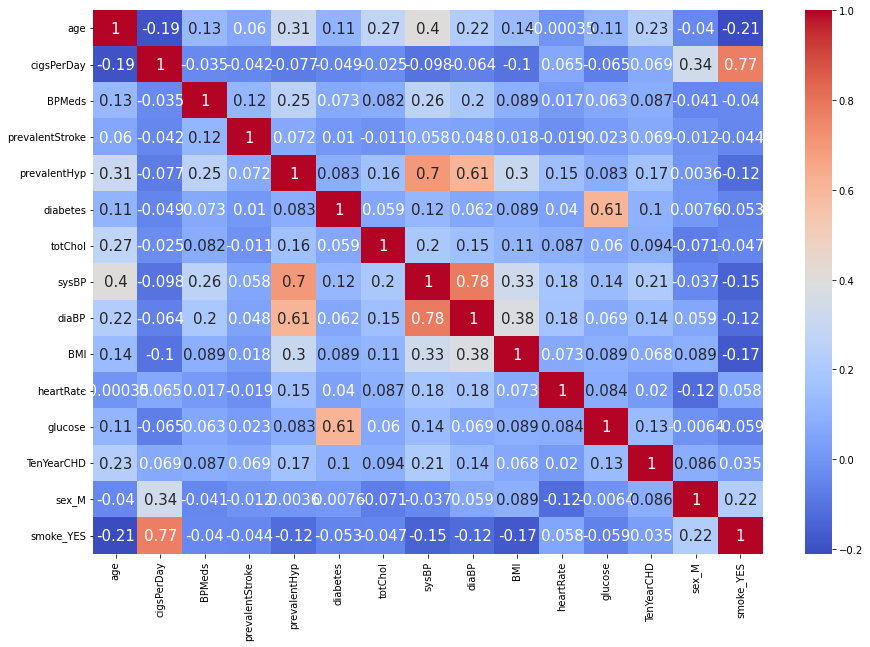

In [23]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [24]:
df = df.drop(['smoke_YES'] , 1)
df['Bp'] = df['sysBP'] + df['diaBP']
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,Bp
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,233.0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,266.0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,187.0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,246.0
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,221.5


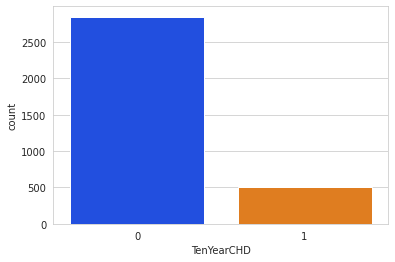

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD' , data = df , palette='bright')

In [26]:
# Class count
class_count_0, class_count_1 = df['TenYearCHD'].value_counts()
print(class_count_1)
print(class_count_0)

504
2848


In [27]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

# **Model Selection**

## Libraries

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

In [473]:
# from sklearn.model_selection import StratifiedKFold
# skfold=StratifiedKFold(n_splits=5)
# model=DecisionTreeClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

## Stratified Sampling

In [401]:
df['TenYearCHD'].value_counts()

0    2848
1     504
Name: TenYearCHD, dtype: int64

In [402]:
504/(504+2848)

0.15035799522673032

In [403]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 11) 
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())
print(y_test.shape)

(2346, 14)
(1006, 14)
0    1984
1     362
Name: TenYearCHD, dtype: int64
(1006,)


In [404]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [405]:
y_test.value_counts()

0    864
1    142
Name: TenYearCHD, dtype: int64

In [406]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [407]:
accuracies = {}
recall = {}

In [408]:
print("Model : Logistic Regression(Test) ")
log_reg = LogisticRegression(max_iter=10000).fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
acc = log_reg.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["Logistic Regression"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : DecisionTree Classifier(Test) ")
dtr = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dtr.predict(X_test)
acc = dtr.score(X_test,y_test)*100
accuracies['DecisionTree'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["DecisionTree"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
accuracies['KNeighbors'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["KNeighbors"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : GaussianNB(Test) ")
gnb = GaussianNB().fit(X_train,y_train)
y_pred = gnb.predict(X_test)
acc = gnb.score(X_test,y_test)*100
accuracies['GaussianNB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["GaussianNB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : XGBClassifier(Test) ")
xgb = XGBClassifier().fit(X_train,y_train)
y_pred = xgb.predict(X_test)
acc = xgb.score(X_test,y_test)*100
accuracies['XGB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["XGB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : RandomForestClassifier(Test) ")
rfc = RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = rfc.score(X_test,y_test)*100
accuracies['RandomForest'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["RandomForest"] = rec*100
print('-'*50)

Model : Logistic Regression(Test) 
[[859   5]
 [120  22]]
Accuracy  :  0.8757455268389662
Precision :  0.8148148148148148
Recall    :  0.15492957746478872
F1        :  0.26035502958579876
--------------------------------------------------
Model : DecisionTree Classifier(Test) 
[[720 144]
 [ 99  43]]
Accuracy  :  0.7584493041749503
Precision :  0.22994652406417113
Recall    :  0.3028169014084507
F1        :  0.2613981762917933
--------------------------------------------------
Model : KNeighborsClassifier(Test) 
[[857   7]
 [134   8]]
Accuracy  :  0.8598409542743539
Precision :  0.5333333333333333
Recall    :  0.056338028169014086
F1        :  0.1019108280254777
--------------------------------------------------
Model : GaussianNB(Test) 
[[803  61]
 [101  41]]
Accuracy  :  0.8389662027833003
Precision :  0.4019607843137255
Recall    :  0.2887323943661972
F1        :  0.33606557377049184
--------------------------------------------------
Model : XGBClassifier(Test) 
[[854  10]
 [128  14]

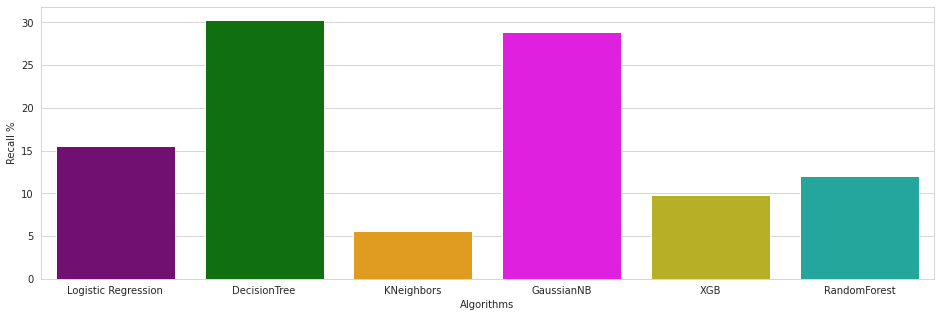

In [409]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
plt.show()

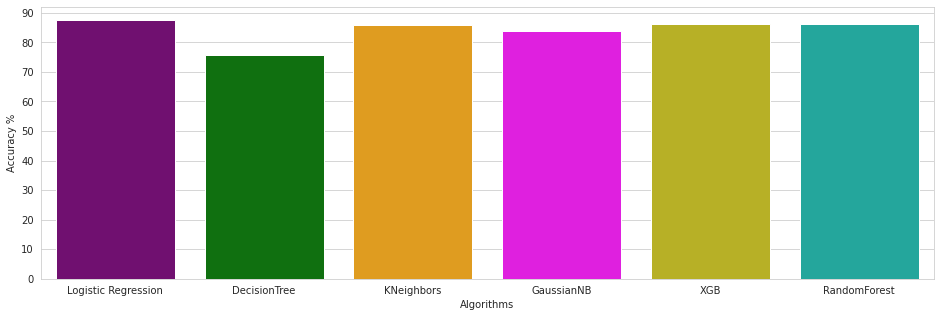

In [410]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## With SMOTE

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [504]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [505]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=5)
X_train_smote,y_train_smote=stomek.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({0: 2134, 1: 380})
The number of classes after fit Counter({0: 2134, 1: 2134})


In [506]:
recall = {}
accuracies = {}

In [507]:
print("Model : Logistic Regression(Test) ")
log_reg = LogisticRegression(max_iter=10000).fit(X_train_smote,y_train_smote)
y_pred = log_reg.predict(X_test)
acc = log_reg.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["Logistic Regression"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : DecisionTree Classifier(Test) ")
dtr = DecisionTreeClassifier().fit(X_train_smote,y_train_smote)
y_pred = dtr.predict(X_test)
acc = dtr.score(X_test,y_test)*100
accuracies['DecisionTree'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["DecisionTree"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
accuracies['KNeighbors'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["KNeighbors"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : GaussianNB(Test) ")
gnb = GaussianNB().fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)
acc = gnb.score(X_test,y_test)*100
accuracies['GaussianNB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["GaussianNB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : XGBClassifier(Test) ")
xgb = XGBClassifier().fit(X_train_smote,y_train_smote)
y_pred = xgb.predict(X_test)
acc = xgb.score(X_test,y_test)*100
accuracies['XGB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["XGB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : RandomForestClassifier(Test) ")
rfc = RandomForestClassifier(n_estimators=1000).fit(X_train_smote,y_train_smote)
y_pred = rfc.predict(X_test)
acc = rfc.score(X_test,y_test)*100
accuracies['RandomForest'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["RandomForest"] = rec*100
print('-'*50)

Model : Logistic Regression(Test) 
[[461 253]
 [ 39  85]]
Accuracy  :  0.6515513126491647
Precision :  0.2514792899408284
Recall    :  0.6854838709677419
F1        :  0.367965367965368
--------------------------------------------------
Model : DecisionTree Classifier(Test) 
[[528 186]
 [ 83  41]]
Accuracy  :  0.6789976133651552
Precision :  0.18061674008810572
Recall    :  0.33064516129032256
F1        :  0.23361823361823358
--------------------------------------------------
Model : KNeighborsClassifier(Test) 
[[434 280]
 [ 48  76]]
Accuracy  :  0.6085918854415274
Precision :  0.21348314606741572
Recall    :  0.6129032258064516
F1        :  0.31666666666666665
--------------------------------------------------
Model : GaussianNB(Test) 
[[624  90]
 [ 73  51]]
Accuracy  :  0.8054892601431981
Precision :  0.3617021276595745
Recall    :  0.4112903225806452
F1        :  0.38490566037735857
--------------------------------------------------
Model : XGBClassifier(Test) 
[[565 149]
 [ 69  55]]

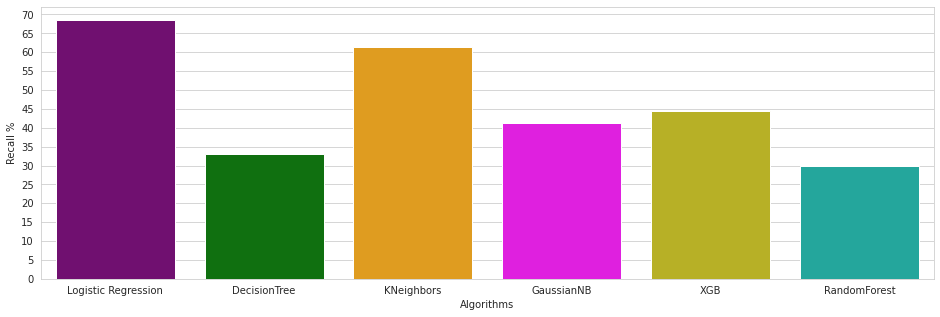

In [508]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
plt.show()

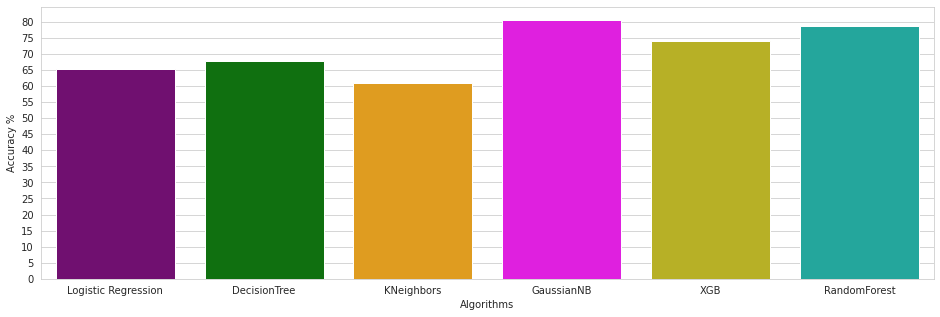

In [509]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [510]:
print("Model : Logistic Regression(Test) ")
penalty = ['l2']
C = [0.01, 0.1, 1, 2, 10, 100]
hyperparameters = dict(C=C, penalty=penalty)
logistic = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
log=GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
log.fit(X_train_smote,y_train_smote)
print(log.best_estimator_)
y_pred = log.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))

Model : Logistic Regression(Test) 
LogisticRegression(C=0.01)
[[468 246]
 [ 37  87]]
Accuracy  :  0.662291169451074
Precision :  0.26126126126126126
Recall    :  0.7016129032258065
F1        :  0.38074398249452956


In [511]:
k_range=range(1,200)
scores=[]
Recall = {}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    y_pred=knn.predict(X_test)
    scores.append(recall_score(y_test, y_pred))
    Recall[k] = recall_score(y_test, y_pred)


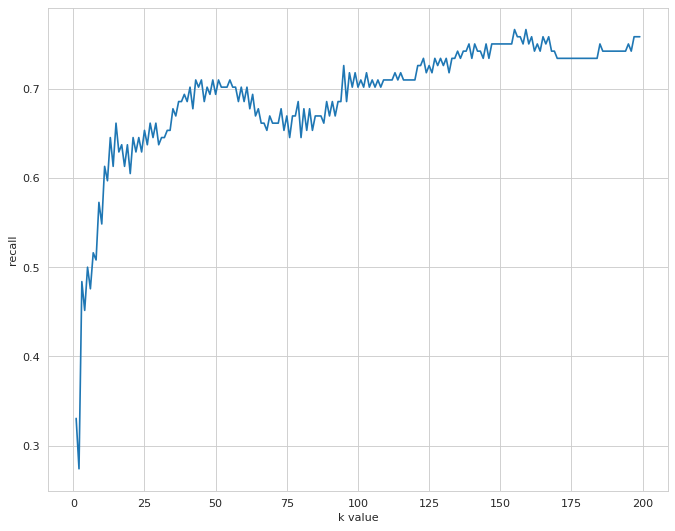

In [512]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('recall')

plt.show()

In [513]:
# print(Recall)
print("Recall is Max at K :" , max(Recall, key=Recall.get))
k_optimum =  max(Recall, key=Recall.get)

Recall is Max at K : 155


In [514]:
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=k_optimum).fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
accuracies['KNeighbors'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["KNeighbors"] = rec*100
print('-'*50)

Model : KNeighborsClassifier(Test) 
[[374 340]
 [ 29  95]]
Accuracy  :  0.5596658711217184
Precision :  0.21839080459770116
Recall    :  0.7661290322580645
F1        :  0.33989266547406083
--------------------------------------------------


## With PCA & SMOTE

In [489]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [490]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(3352, 11)

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=11)

In [492]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test  = sc.transform(X_test)

In [493]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=5)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({0: 1984, 1: 362})
The number of classes after fit Counter({0: 1984, 1: 1984})


In [494]:
recall = {}
accuracies = {}

In [495]:
print("Model : Logistic Regression(Test) ")
log_reg = LogisticRegression(max_iter=10000).fit(X_train_smote,y_train_smote)
y_pred = log_reg.predict(X_test)
acc = log_reg.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["Logistic Regression"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : DecisionTree Classifier(Test) ")
dtr = DecisionTreeClassifier().fit(X_train_smote,y_train_smote)
y_pred = dtr.predict(X_test)
acc = dtr.score(X_test,y_test)*100
accuracies['DecisionTree'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["DecisionTree"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
accuracies['KNeighbors'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["KNeighbors"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : GaussianNB(Test) ")
gnb = GaussianNB().fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)
acc = gnb.score(X_test,y_test)*100
accuracies['GaussianNB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["GaussianNB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : XGBClassifier(Test) ")
xgb = XGBClassifier().fit(X_train_smote,y_train_smote)
y_pred = xgb.predict(X_test)
acc = xgb.score(X_test,y_test)*100
accuracies['XGB'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["XGB"] = rec*100
print('-'*50)
#-------------------------------------------------------------------------------------------------------------------------
print("Model : RandomForestClassifier(Test) ")
rfc = RandomForestClassifier(n_estimators=1000).fit(X_train_smote,y_train_smote)
y_pred = rfc.predict(X_test)
acc = rfc.score(X_test,y_test)*100
accuracies['RandomForest'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["RandomForest"] = rec*100
print('-'*50)

Model : Logistic Regression(Test) 
[[561 303]
 [ 39 103]]
Accuracy  :  0.6600397614314115
Precision :  0.2536945812807882
Recall    :  0.7253521126760564
F1        :  0.37591240875912413
--------------------------------------------------
Model : DecisionTree Classifier(Test) 
[[647 217]
 [ 97  45]]
Accuracy  :  0.6878727634194831
Precision :  0.1717557251908397
Recall    :  0.31690140845070425
F1        :  0.22277227722772278
--------------------------------------------------
Model : KNeighborsClassifier(Test) 
[[523 341]
 [ 55  87]]
Accuracy  :  0.6063618290258449
Precision :  0.20327102803738317
Recall    :  0.6126760563380281
F1        :  0.30526315789473685
--------------------------------------------------
Model : GaussianNB(Test) 
[[744 120]
 [ 85  57]]
Accuracy  :  0.7962226640159046
Precision :  0.3220338983050847
Recall    :  0.4014084507042254
F1        :  0.35736677115987464
--------------------------------------------------
Model : XGBClassifier(Test) 
[[596 268]
 [ 62  80]

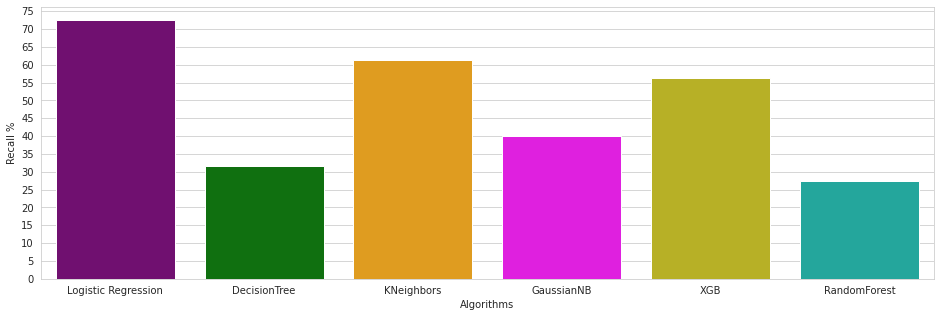

In [496]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
plt.show()

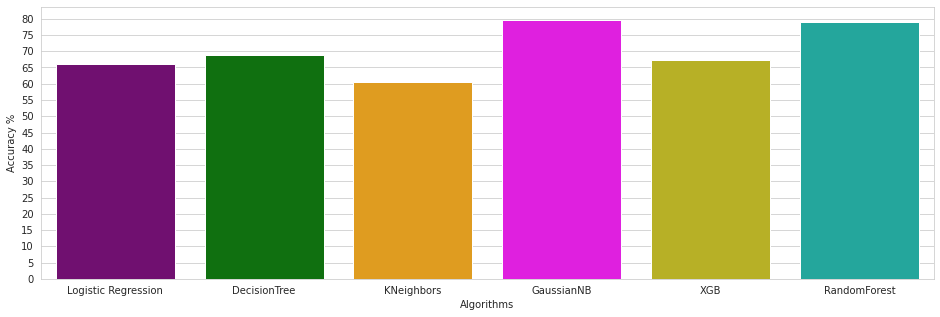

In [497]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [498]:
print("Model : Logistic Regression(Test) ")
penalty = ['l2']
C = [0.01, 0.1, 1, 2, 10, 100]
hyperparameters = dict(C=C, penalty=penalty)
logistic = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
log=GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
log.fit(X_train_smote,y_train_smote)
print(log.best_estimator_)
y_pred = log.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))

Model : Logistic Regression(Test) 
LogisticRegression(C=0.01)
[[565 299]
 [ 40 102]]
Accuracy  :  0.6630218687872763
Precision :  0.2543640897755611
Recall    :  0.7183098591549296
F1        :  0.3756906077348066


In [499]:
k_range=range(1,200)
scores=[]
Recall = {}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    y_pred=knn.predict(X_test)
    scores.append(recall_score(y_test, y_pred))
    Recall[k] = recall_score(y_test, y_pred)


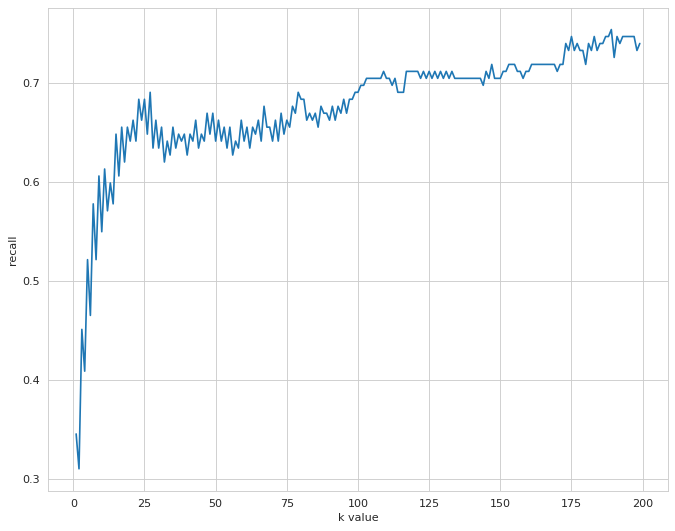

In [500]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('recall')

plt.show()

In [501]:
# print(Recall)
print("Recall is Max at K :" , max(Recall, key=Recall.get))
k_optimum =  max(Recall, key=Recall.get)

Recall is Max at K : 189


In [502]:
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=k_optimum).fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
accuracies['KNeighbors'] = acc
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
rec = (recall_score(y_test, y_pred))
recall["KNeighbors"] = rec*100
print('-'*50)

Model : KNeighborsClassifier(Test) 
[[477 387]
 [ 35 107]]
Accuracy  :  0.5805168986083499
Precision :  0.2165991902834008
Recall    :  0.7535211267605634
F1        :  0.33647798742138363
--------------------------------------------------


# **JUNK**

In [1]:
# knn_h = KNeighborsClassifier()
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# # param_grid_nb = {
# #     'leaf_size' : list(range(1,50))
# #     'n_neighbors' : list(range(1,30))
# #     'p':[1,2]
# # }
# from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# knn_h_classifier=RandomizedSearchCV(knn_h, hyperparameters ,cv=10 ,n_jobs=-1)
# knn_h_classifier.fit(X_train, y_train)
# print(knn_h_classifier.best_estimator_)
# y_pred = knn_h_classifier.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))

In [2]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score


In [3]:
# print("Model : RandomForestClassifier(Test-SMOTE_Tomek) ")
# rfc = RandomForestClassifier(n_estimators=1000).fit(X_train_stomek,y_train_stomek)
# y_pred = rfc.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))
# print('-'*50)
# print("Model : RandomForestClassifier(Train-SMOTE_Tomek) ")
# rfc = RandomForestClassifier(n_estimators=1000).fit(X_train_stomek,y_train_stomek)
# y_pred = rfc.predict(X_train)
# print(confusion_matrix(y_train, y_pred))
# print("Accuracy  : ",accuracy_score(y_train, y_pred))
# print("Precision : ",precision_score(y_train, y_pred))
# print("Recall    : ",recall_score(y_train, y_pred))
# print("F1        : ",f1_score(y_train, y_pred))
# print('@'*50)

# print("Model : GaussianNB(Test-SMOTE_Tomek) ")
# gnb = GaussianNB().fit(X_train_stomek,y_train_stomek)
# y_pred = gnb.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))
# print('-'*50)
# print("Model : GaussianNB(Train-SMOTE_Tomek) ")
# gnb = GaussianNB().fit(X_train_stomek,y_train_stomek)
# y_pred = gnb.predict(X_train)
# print(confusion_matrix(y_train, y_pred))
# print("Accuracy  : ",accuracy_score(y_train, y_pred))
# print("Precision : ",precision_score(y_train, y_pred))
# print("Recall    : ",recall_score(y_train, y_pred))
# print("F1        : ",f1_score(y_train, y_pred))

# # from sklearn.ensemble import RandomForestClassifier
# # print("Model : RandomForestClassifier(Train) ")
# # rfc=RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
# # y_pred = rfc.predict(X_train)
# # Accuracy=accuracy_score(y_train,y_pred)
# # print("Accuracy :" , Accuracy)
# # print("-"*100)

In [4]:

# print("Model : GaussianNB(Test-SMOTE_Tomek) ")
# gnb = GaussianNB().fit(X_train_stomek,y_train_stomek)
# y_pred = gnb.predict(X_test)
# # print(gnb.best_params_)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))

In [5]:
# gnb_h = GaussianNB()
# param_grid_nb = {
#     'var_smoothing': np.logspace(0,-9, num=100)
# }
# from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# gnb_h_classifier=GridSearchCV(estimator=gnb_h, param_grid=param_grid_nb ,cv=10 ,n_jobs=-1)
# gnb_h_classifier.fit(X_train, y_train)
# print(gnb_h_classifier.best_estimator_)
# y_pred = gnb_h_classifier.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

NameError: ignored

In [ ]:
# # Number of trees
# n_estimators = [50,80,100]

# # Maximum depth of trees
# max_depth = [4,6,8]

# # Minimum number of samples required to split a node
# min_samples_split = [50,100,150]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [40,50]

# # HYperparameter Grid
# param_dict = {'n_estimators' : n_estimators,
#               'max_depth' : max_depth,
#               'min_samples_split' : min_samples_split,
#               'min_samples_leaf' : min_samples_leaf}

# # Create an instance of the RandomForestClassifier
# rf_model = RandomForestClassifier()

# # Grid search
# rf_grid = GridSearchCV(estimator=rf_model,
#                        param_grid = param_dict,
#                        cv = 5, verbose=2, scoring='roc_auc')

# rf_grid.fit(X_train,Y_train)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# print("Model : LogisticRegression(Test) ")
# log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from sklearn.linear_model import LogisticRegression
# print("Model : LogisticRegression(Train) ")
# log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
# y_pred = log_reg.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)
# print("-"*100)
# # ----------------------------------------------------------------------------------------------------------------------------------------------------
# from sklearn.tree import DecisionTreeClassifier
# print("Model : DecisionTreeClassifier(Test) ")
# dtc = DecisionTreeClassifier().fit(X_train, y_train)
# y_pred = dtc.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from sklearn.tree import DecisionTreeClassifier
# print("Model : DecisionTreeClassifier(Train) ")
# dtc = DecisionTreeClassifier().fit(X_train, y_train)
# y_pred = dtc.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)
# print("-"*100)
# # ----------------------------------------------------------------------------------------------------------------------------------------------------
# from sklearn.ensemble import RandomForestClassifier
# print("Model : RandomForestClassifier(Test) ")

# rfc=RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
# y_pred = rfc.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from sklearn.ensemble import RandomForestClassifier
# print("Model : RandomForestClassifier(Train) ")
# rfc=RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
# y_pred = rfc.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)
# print("-"*100)
# # ----------------------------------------------------------------------------------------------------------------------------------------------------
# from xgboost import XGBClassifier
# print("Model : XGBClassifier(Train)")
# xgb=XGBClassifier().fit(X_train, y_train)
# y_pred = xgb.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from xgboost import XGBClassifier
# print("Model : XGBClassifier(Train)")
# xgb=XGBClassifier().fit(X_train, y_train)
# y_pred = xgb.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)
# print("-"*100)
# # ----------------------------------------------------------------------------------------------------------------------------------------------------
# from sklearn.neighbors import KNeighborsClassifier
# print("Model : KNeighborsClassifier(Test)")
# knn = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from sklearn.neighbors import KNeighborsClassifier
# print("Model : KNeighborsClassifier(Train)")
# knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
# y_pred = knn.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)
# print("-"*100)
# # ----------------------------------------------------------------------------------------------------------------------------------------------------
# from sklearn.naive_bayes import GaussianNB
# print("Model : GaussianNB(Test)")
# gnb = GaussianNB().fit(X_train, y_train)
# y_pred = gnb.predict(X_test)
# Accuracy=accuracy_score(y_test,y_pred)
# print("Accuracy :" , Accuracy)

# from sklearn.naive_bayes import GaussianNB
# print("Model : GaussianNB(Train)")
# gnb = GaussianNB().fit(X_train, y_train)
# y_pred = gnb.predict(X_train)
# Accuracy=accuracy_score(y_train,y_pred)
# print("Accuracy :" , Accuracy)

In [ ]:
# knn_h = KNeighborsClassifier()
# # leaf_size = list(range(1,30))
# n_neighbors = list(range(50,200))
# # p=[1,2]
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# # param_grid_nb = {
# #     'leaf_size' : list(range(1,50))
# #     'n_neighbors' : list(range(1,30))
# #     'p':[1,2]
# # }
# from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# knn_h_classifier=GridSearchCV(knn_h, hyperparameters ,cv=10 ,n_jobs=-1)
# knn_h_classifier.fit(X_train, y_train)
# print(knn_h_classifier.best_estimator_)
# y_pred = knn_h_classifier.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy  : ",accuracy_score(y_test, y_pred))
# print("Precision : ",precision_score(y_test, y_pred))
# print("Recall    : ",recall_score(y_test, y_pred))
# print("F1        : ",f1_score(y_test, y_pred))